# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [1]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


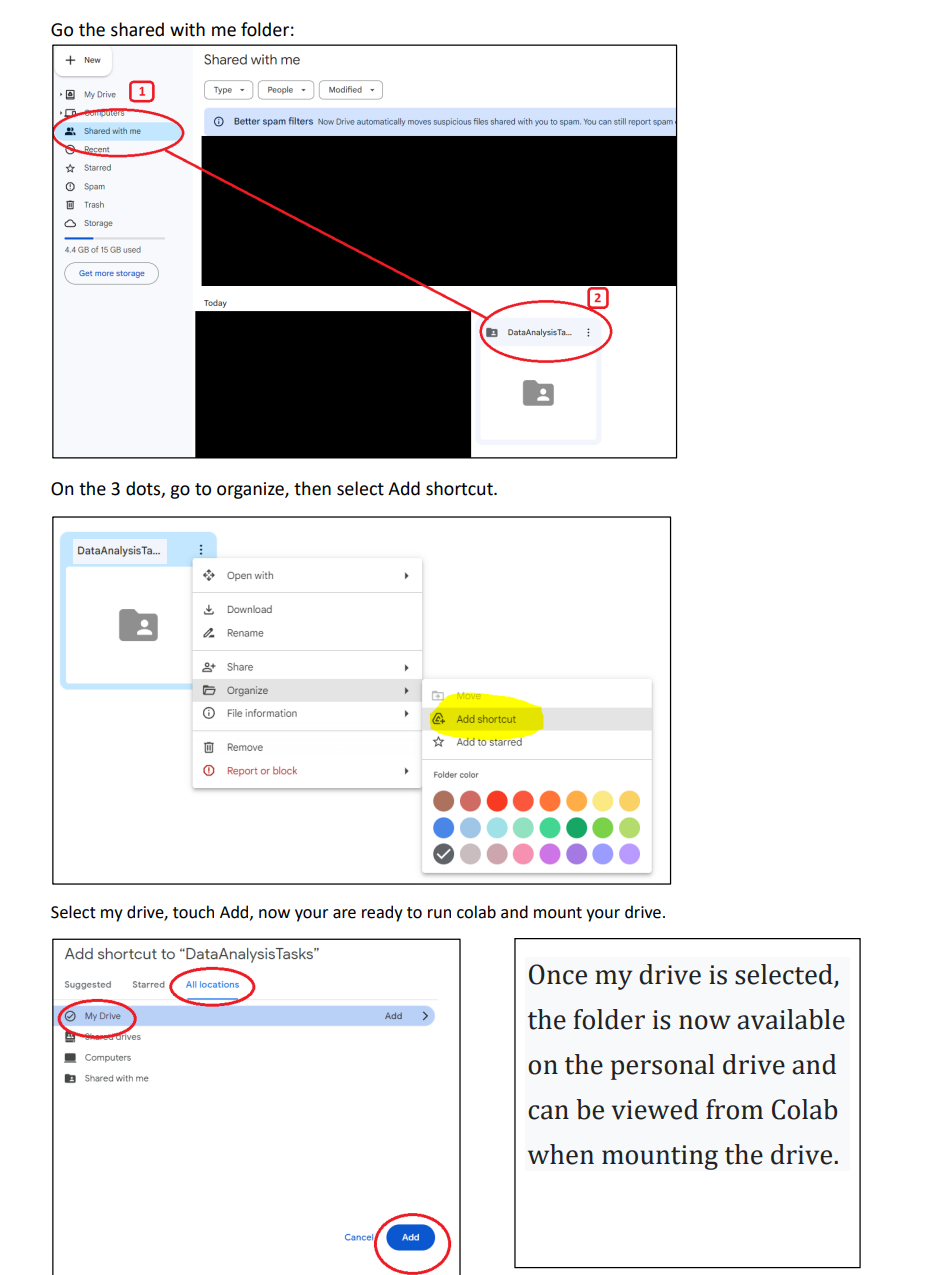

In [2]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/company_dataset.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [4]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








In [5]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, CustomJS, Dropdown
from bokeh.layouts import column
from bokeh.palettes import Spectral4

# Read the data
data = pd.read_csv('/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/digital_currency_time_series.csv')
data['Date'] = pd.to_datetime(data['Unnamed: 0'])
data.drop('Unnamed: 0', axis=1, inplace=True)

# Set up initial data source and plot
source = ColumnDataSource(data={
    'Date': data['Date'],
    'open': data['open_SAR'],
    'high': data['high_SAR'],
    'low': data['low_SAR'],
    'close': data['close_SAR'],
    'volume': data['volume']
})

p = figure(width=800, height=400, x_axis_type='datetime', title="Digital Currency Time Series")
p.line('Date', 'open', source=source, legend_label='Open', line_width=2, color=Spectral4[0])
p.line('Date', 'high', source=source, legend_label='High', line_width=2, color=Spectral4[1])
p.line('Date', 'low', source=source, legend_label='Low', line_width=2, color=Spectral4[2])
p.line('Date', 'close', source=source, legend_label='Close', line_width=2, color=Spectral4[3])
p.legend.title = 'Currency Value'
p.legend.location = "top_left"
p.legend.click_policy="hide"

# Add volume as bars
v = figure(width=800, height=250, x_axis_type='datetime', title="Trade Volume", x_range=p.x_range)
v.vbar(x='Date', top='volume', source=source, width=0.9)

# Dropdown menu for selecting currency
menu = [("SAR", "SAR"), ("USD", "USD")]
dropdown = Dropdown(label="Select Currency", button_type="warning", menu=menu)

# Convert DataFrame columns to lists for CustomJS
open_SAR = data['open_SAR'].tolist()
high_SAR = data['high_SAR'].tolist()
low_SAR = data['low_SAR'].tolist()
close_SAR = data['close_SAR'].tolist()
open_USD = data['open_USD'].tolist()
high_USD = data['high_USD'].tolist()
low_USD = data['low_USD'].tolist()
close_USD = data['close_USD'].tolist()

# CustomJS callback to change data based on dropdown selection
callback = CustomJS(args=dict(source=source,
                              open_SAR=open_SAR,
                              high_SAR=high_SAR,
                              low_SAR=low_SAR,
                              close_SAR=close_SAR,
                              open_USD=open_USD,
                              high_USD=high_USD,
                              low_USD=low_USD,
                              close_USD=close_USD), code="""
    var currency = this.item;
    if (currency === 'SAR') {
        source.data['open'] = open_SAR;
        source.data['high'] = high_SAR;
        source.data['low'] = low_SAR;
        source.data['close'] = close_SAR;
    } else {
        source.data['open'] = open_USD;
        source.data['high'] = high_USD;
        source.data['low'] = low_USD;
        source.data['close'] = close_USD;
    }
    source.change.emit();
""")
dropdown.js_on_event("menu_item_click", callback)

# Combine plots and widget in a layout
layout = column(dropdown, p, v)
output_notebook()
show(layout)